## Data Preparation

This Jupyter notebook is used to:

1. Clean the data (null values) and handle data types (such as timestamp).
2. One-Hot encode categorical features.
3. Standardize & Normalize continuous features.
4. Check correlations.
5. Write the result to single file, ready for ML model (model_*).

## 0. Load the data

In [1]:
# imports:
import pandas as pd
import matplotlib.pyplot as plt
import os

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'query_output_processing.csv'
print(INPUT_CSV)

raw_data = pd.read_csv(INPUT_CSV, low_memory=False)

# check that all columns are correctly loaded
raw_data.head()

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/query_output_processing.csv


originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25  0x1f8  CmGyJE1j85YCxdfU11                    SF   
1  192.168.10.25  0x203  CrQYXi31zeWi5ctOV3                  RSTR   
2  192.168.10.25  0x242    CZkudaLCla2OSyoe                    SF   
3  192.168.10.25  0x2ed  ClAVb94wj52huMTTsk                    SF   
4  192.168.10.25  0x3bf  CrERlA4DQq56CuqVSi                    S0   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.015328                     37                       157   
1             0.023361                     37                       181   
2            31.793870                   1279                      3319   
3            29.150080                    985                      2301   
4             0.000027                    650                      1014   

   connection.orig_p  connection.orig_pkts connection.proto  ...  \
0              52528                     3              tcp  ...   
1              52544                     3              tcp  ...   
2              52793                    39              tcp  ...   
3              52803                    26              tcp  ...   
4              49333                    13              udp  ...   

   resp_resp_similar_http_status_code_count  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   resp_resp_similar_http_user_agent_count  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   resp_resp_similar_ssl_version_count  resp_resp_similar_ssl_cipher_count  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

  resp_resp_similar_ssl_curve_count  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

  resp_resp_similar_ssl_validation_status_count  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  resp_resp_similar_files_source_count  resp_resp_similar_file_md5_count  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   attacker_label  victim_label  
0              No            No  
1              No            No  
2              No            No  
3              No            No  
4              No            No  

[5 rows x 219 columns]

In [2]:
pd.set_option('display.max_columns', None)
raw_data

originated_ip       uid      connection.uid connection.conn_state  \
0      192.168.10.25     0x1f8  CmGyJE1j85YCxdfU11                    SF   
1      192.168.10.25     0x203  CrQYXi31zeWi5ctOV3                  RSTR   
2      192.168.10.25     0x242    CZkudaLCla2OSyoe                    SF   
3      192.168.10.25     0x2ed  ClAVb94wj52huMTTsk                    SF   
4      192.168.10.25     0x3bf  CrERlA4DQq56CuqVSi                    S0   
...              ...       ...                 ...                   ...   
20714     172.16.0.1  0x2f52d9  COzazt24eOe6bB7jQ1                   REJ   
20715     172.16.0.1  0x2f52ea  CtP0G931w6q5Wa5hpl                  RSTO   
20716     172.16.0.1  0x2f52f2  CAzN3v3nZSleHp42s4                   REJ   
20717     172.16.0.1  0x2f53e2  CnJuJ51MBKXh3tNoSj                   REJ   
20718   192.168.10.1  0x27b129   Ceqado4fqMVgHzHlN                   OTH   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0                 0.015328                     37                       157   
1                 0.023361                     37                       181   
2                31.793870                   1279                      3319   
3                29.150080                    985                      2301   
4                 0.000027                    650                      1014   
...                    ...                    ...                       ...   
20714             0.000125                      0                        44   
20715             0.000868                      0                       164   
20716             0.000151                      0                        60   
20717             0.000119                      0                        60   
20718             3.139605                     84                       168   

       connection.orig_p  connection.orig_pkts connection.proto  \
0                  52528                     3              tcp   
1                  52544                     3              tcp   
2                  52793                    39              tcp   
3                  52803                    26              tcp   
4                  49333                    13              udp   
...                  ...                   ...              ...   
20714              57636                     1              tcp   
20715              44660                     3              tcp   
20716              55734                     1              tcp   
20717              43482                     1              tcp   
20718                  3                     3             icmp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                          0                        40                443   
1                         37                       141                443   
2                      89000                     91820                443   
3                      53663                     55543                443   
4                          0                         0                137   
...                      ...                       ...                ...   
20714                      0                        40                444   
20715                      0                        60                 80   
20716                      0                        40                443   
20717                      0                        40                443   
20718                      0                         0                  3   

       connection.resp_pkts connection.service                connection.ts  \
0                         1               none   2017-07-07T16:35:59.65674Z   
1                         2               none  2017-07-07T16:35:59.659567Z   
2                        54                ssl  2017-07-07T16:50:46.362101Z   
3                        36                ssl  2017-07-07T16:53:52.704343Z   
4                   

### Frequency percentage of labels:

In [3]:
raw_data['attacker_label'].value_counts()

No     20492
Yes      227
Name: attacker_label, dtype: int64

In [4]:
count_attacker = pd.value_counts(raw_data['attacker_label'])
count_victim = pd.value_counts(raw_data['victim_label'])
percentage_df = pd.DataFrame({'Class':['Yes', 'No'], 'Frequency Percentage':[min(count_victim['Yes'], count_attacker['Yes'])/len(raw_data), 
                                                                             (len(raw_data) - min(count_victim['Yes'], count_attacker['Yes']))/len(raw_data)]})

In [5]:
percentage_df

Class  Frequency Percentage
0   Yes              0.010956
1    No              0.989044

<AxesSubplot:xlabel='Class'>

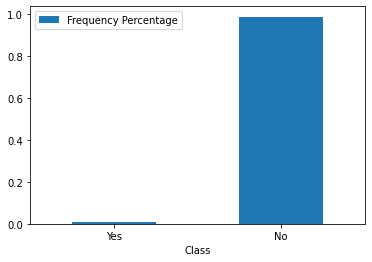

In [6]:
percentage_df.plot.bar(x='Class', y='Frequency Percentage', rot=0)

# Data cleaning & preparation

(https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)

Possible problems:

1. Missing values (here only specific values in rows)
2. Data distribution (see more heavily represented ranges, check outliers)
3. Impossible values ("date == blue")
4. Data consistency (lower vs. uppercase)

### 1.0 Null values 

a) ignore

b) drop row/ column with these

c) fill in missing values

In [7]:
# clean garbage (null, NaN, ..)
pd.set_option('display.max_rows', None)
raw_data.isnull().sum()

originated_ip                                      0
uid                                                0
connection.uid                                     0
connection.conn_state                              0
connection.duration                                0
connection.orig_bytes                              0
connection.orig_ip_bytes                           0
connection.orig_p                                  0
connection.orig_pkts                               0
connection.proto                                   0
connection.resp_bytes                              0
connection.resp_ip_bytes                           0
connection.resp_p                                  0
connection.resp_pkts                               0
connection.service                                 0
connection.ts                                      0
responded_ip                                       0
dns_count                                          0
ssh_count                                     

In [8]:
pd.reset_option('display.max_rows')

In [9]:
raw_data[raw_data.isnull().any(axis=1)]

originated_ip       uid      connection.uid connection.conn_state  \
20491    172.16.0.1     0x560  CqFgcf26YyrKOiRRq1                   REJ   
20492    172.16.0.1     0x563  CADtlc4F3UulLJ9vZh                   REJ   
20493    172.16.0.1     0x567   CRHJuW2nIQNFmYmjk                   REJ   
20494    172.16.0.1     0x572  CnHPQt2ReToHGONMHa                  RSTO   
20495    172.16.0.1     0x574  CMo6i31J9ubZUZeY5j                  RSTO   
...             ...       ...                 ...                   ...   
20714    172.16.0.1  0x2f52d9  COzazt24eOe6bB7jQ1                   REJ   
20715    172.16.0.1  0x2f52ea  CtP0G931w6q5Wa5hpl                  RSTO   
20716    172.16.0.1  0x2f52f2  CAzN3v3nZSleHp42s4                   REJ   
20717    172.16.0.1  0x2f53e2  CnJuJ51MBKXh3tNoSj                   REJ   
20718  192.168.10.1  0x27b129   Ceqado4fqMVgHzHlN                   OTH   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
20491             0.000094                      0                        44   
20492             0.000124                      0                        44   
20493             0.000054                      0                        44   
20494             0.000698                      0                       164   
20495             0.000826                      0                       164   
...                    ...                    ...                       ...   
20714             0.000125                      0                        44   
20715             0.000868                      0                       164   
20716             0.000151                      0                        60   
20717             0.000119                      0                        60   
20718             3.139605                     84                       168   

       connection.orig_p  connection.orig_pkts connection.proto  \
20491              54998                     1              tcp   
20492              54987                     1              tcp   
20493              57636                     1              tcp   
20494              52776                     3              tcp   
20495              38068                     3              tcp   
...                  ...                   ...              ...   
20714              57636                     1              tcp   
20715              44660                     3              tcp   
20716              55734                     1              tcp   
20717              43482                     1              tcp   
20718                  3                     3             icmp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
20491                      0                        40                443   
20492                      0                        40                444   
20493                      0                        40                443   
20494                      0                        60                 80   
20495                      0                        60                 22   
...                      ...                       ...                ...   
20714                      0                        40                444   
20715                      0                        60                 80   
20716                      0                        40                443   
20717                      0                        40                443   
20718                      0                         0                  3   

       connection.resp_pkts connection.service                connection.ts  \
20491                     1               none  2017-07-07T16:55:33.417678Z   
20492                     1               none  2017-07-07T16:55:36.334786Z   
20493                     1               none  2017-07-07T16:55:46.824395Z   
20494                     1               none  2017-07-07T16:59:52.535503Z   
20495                     1    

In [10]:
raw_data['dns_qtype'].fillna('[]', inplace = True)
raw_data['dns_rcode'].fillna('[]', inplace = True)
raw_data['ssh_auth_attempts'].fillna('[]', inplace = True)
raw_data['ssh_host_key'].fillna('[]', inplace = True)
raw_data['http_method'].fillna('[]', inplace = True)
raw_data['http_status_code'].fillna('[]', inplace = True)
raw_data['http_user_agent'].fillna('[]', inplace = True)
raw_data['ssl_version'].fillna('[]', inplace = True)
raw_data['ssl_cipher'].fillna('[]', inplace = True)
raw_data['ssl_curve'].fillna('[]', inplace = True)
raw_data['ssl_validation_status'].fillna('[]', inplace = True)
raw_data['files_source'].fillna('[]', inplace = True)
raw_data['file_md5'].fillna('[]', inplace = True)
raw_data['dns_dicts'].fillna('[]', inplace = True)
raw_data['ssh_dicts'].fillna('[]', inplace = True)
raw_data['http_dicts'].fillna('[]', inplace = True)
raw_data['ssl_dicts'].fillna('[]', inplace = True)
raw_data['files_dicts'].fillna('[]', inplace = True)

In [11]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [originated_ip, uid, connection.uid, connection.conn_state, connection.duration, connection.orig_bytes, connection.orig_ip_bytes, connection.orig_p, connection.orig_pkts, connection.proto, connection.resp_bytes, connection.resp_ip_bytes, connection.resp_p, connection.resp_pkts, connection.service, connection.ts, responded_ip, dns_count, ssh_count, http_count, ssl_count, files_count, dns_qtype, dns_rcode, ssh_auth_attempts, ssh_host_key, http_method, http_status_code, http_user_agent, ssl_version, ssl_cipher, ssl_curve, ssl_validation_status, files_source, file_md5, dns_dicts, ssh_dicts, http_dicts, ssl_dicts, files_dicts, connection.time, orig_orig_total, orig_orig_proto_tcp_count, orig_orig_proto_udp_count, orig_orig_proto_icmp_count, orig_orig_connection.protocol_mode, orig_orig_connection.service_mode, orig_orig_connection.conn_state_mode, orig_orig_connection.time_mean, orig_orig_connection.duration_mean, orig_orig_connection.orig_bytes_mean, orig_orig_connection.orig_pkts_mean, orig_orig_connection.resp_bytes_mean, orig_orig_connection.resp_pkts_mean, orig_orig_orig_p_well_known_count, orig_orig_orig_p_reg_or_dyn_count, orig_orig_resp_p_21_count, orig_orig_resp_p_22_count, orig_orig_resp_p_53_count, orig_orig_resp_p_80_count, orig_orig_resp_p_123_count, orig_orig_resp_p_443_count, orig_orig_resp_p_3389_count, orig_orig_resp_p_well_known_count, orig_orig_resp_p_reg_count, orig_orig_resp_p_dyn_count, orig_orig_dns_count_mean, orig_orig_ssh_count_mean, orig_orig_http_count_mean, orig_orig_ssl_count_mean, orig_orig_files_count_mean, orig_orig_similar_conns_count, orig_orig_similar_dns_qtype_count, orig_orig_similar_dns_rcode_count, orig_orig_similar_ssh_auth_attempts_count, orig_orig_similar_ssh_host_key_count, orig_orig_similar_http_method_count, orig_orig_similar_http_status_code_count, orig_orig_similar_http_user_agent_count, orig_orig_similar_ssl_version_count, orig_orig_similar_ssl_cipher_count, orig_orig_similar_ssl_curve_count, orig_orig_similar_ssl_validation_status_count, orig_orig_similar_files_source_count, orig_orig_similar_file_md5_count, orig_resp_total, orig_resp_proto_tcp_count, orig_resp_proto_udp_count, orig_resp_proto_icmp_count, orig_resp_connection.protocol_mode, orig_resp_connection.service_mode, orig_resp_connection.conn_state_mode, orig_resp_connection.time_mean, orig_resp_connection.duration_mean, orig_resp_connection.orig_bytes_mean, orig_resp_connection.orig_pkts_mean, orig_resp_connection.resp_bytes_mean, orig_resp_connection.resp_pkts_mean, orig_resp_orig_p_well_known_count, orig_resp_orig_p_reg_or_dyn_count, ...]
Index: []

In [12]:
data = raw_data.copy()

### 1.1 Time

Convert `date` type to `timestamp`.

In [13]:
data['orig_orig_connection.time_mean'].describe()

count                                   20719
unique                                   1495
top       2017-07-07 16:36:26.038134016+00:00
freq                                      740
Name: orig_orig_connection.time_mean, dtype: object

In [14]:
# connection.ts is in RFC 3339, ISO 8601 date format
# convert values of 'connections.ts' column to timestamp

import dateutil.parser # https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date
from datetime import datetime


def date_to_timestamp(connection_ts):
  date_format = dateutil.parser.isoparse(connection_ts)
  timestamp = datetime.timestamp(date_format)
  return timestamp

data['connection.time'] = data['connection.time'].map(lambda x: date_to_timestamp(x))
data['orig_orig_connection.time_mean'] = data['orig_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['orig_resp_connection.time_mean'] = data['orig_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_orig_connection.time_mean'] = data['resp_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_resp_connection.time_mean'] = data['resp_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))


data.head()

originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25  0x1f8  CmGyJE1j85YCxdfU11                    SF   
1  192.168.10.25  0x203  CrQYXi31zeWi5ctOV3                  RSTR   
2  192.168.10.25  0x242    CZkudaLCla2OSyoe                    SF   
3  192.168.10.25  0x2ed  ClAVb94wj52huMTTsk                    SF   
4  192.168.10.25  0x3bf  CrERlA4DQq56CuqVSi                    S0   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.015328                     37                       157   
1             0.023361                     37                       181   
2            31.793870                   1279                      3319   
3            29.150080                    985                      2301   
4             0.000027                    650                      1014   

   connection.orig_p  connection.orig_pkts connection.proto  \
0              52528                     3              tcp   
1              52544                     3              tcp   
2              52793                    39              tcp   
3              52803                    26              tcp   
4              49333                    13              udp   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                      0                        40                443   
1                     37                       141                443   
2                  89000                     91820                443   
3                  53663                     55543                443   
4                      0                         0                137   

   connection.resp_pkts connection.service                connection.ts  \
0                     1               none   2017-07-07T16:35:59.65674Z   
1                     2               none  2017-07-07T16:35:59.659567Z   
2                    54                ssl  2017-07-07T16:50:46.362101Z   
3                    36                ssl  2017-07-07T16:53:52.704343Z   
4                     0                dns  2017-07-07T16:37:22.211056Z   

     responded_ip  dns_count  ssh_count  http_count  ssl_count  files_count  \
0  104.16.161.133          0          0           0          0            0   
1   104.88.89.135          0          0           0          0            0   
2  162.248.185.53          0          0           0          1            0   
3    80.247.66.26          0          0           0          1            4   
4  192.168.10.255          1          0           0          0            0   

  dns_qtype dns_rcode ssh_auth_attempts ssh_host_key http_method  \
0        []        []                []           []          []   
1        []        []                []           []          []   
2        []        []                []           []          []   
3        []        []                []           []          []   
4      [32]    [None]                []           []          []   

  http_status_code http_user_agent ssl_version  \
0               []              []          []   
1               []              []          []   
2               []              []  ['TLSv10']   
3               []              []  ['TLSv10']   
4               []              []          []   

                         ssl_cipher ssl_curve ssl_validation_status  \
0                                []        []                    []   
1                                []        []                    []   
2  ['TLS_RSA_WITH_AES_256_CBC_SHA']    [None]                [None]   
3  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
4                                []        []                    []   

  files_source                                           file_md5  \
0           []                                                 []   
1           []                                                 []   
2           []                                   

### Extract column names

In [15]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [16]:
selected_df = data[CONN_IDS_COLS +
                   CONN_NUMERICAL_COLS +
                   CONN_CATEGORICAL_COLS + 
                   CONN_APP_STATS +
                   ORIG_ORIG_NUMERICAL_COLS + 
                   ORIG_ORIG_CATEGORICAL_COLS +
                   ORIG_ORIG_PORTS_COLS + 
                   ORIG_ORIG_APP_STATS_COLS +
                   ORIG_ORIG_SIMILAR_COLS + 
                   ORIG_RESP_NUMERICAL_COLS + 
                   ORIG_RESP_CATEGORICAL_COLS + 
                   ORIG_RESP_PORTS_COLS + 
                   ORIG_RESP_APP_STATS_COLS + 
                   ORIG_RESP_SIMILAR_COLS + 
                   RESP_ORIG_NUMERICAL_COLS + 
                   RESP_ORIG_CATEGORICAL_COLS + 
                   RESP_ORIG_PORTS_COLS + 
                   RESP_ORIG_APP_STATS_COLS + 
                   RESP_ORIG_SIMILAR_COLS + 
                   RESP_RESP_NUMERICAL_COLS +
                   RESP_RESP_CATEGORICAL_COLS + 
                   RESP_RESP_PORTS_COLS +
                   RESP_RESP_APP_STATS_COLS +
                   RESP_RESP_SIMILAR_COLS +
                   BACKUP_COLS] # backup for later
selected_df.head(5)

connection.uid  originated_ip    responded_ip  connection.time  \
0  CmGyJE1j85YCxdfU11  192.168.10.25  104.16.161.133     1.499445e+09   
1  CrQYXi31zeWi5ctOV3  192.168.10.25   104.88.89.135     1.499445e+09   
2    CZkudaLCla2OSyoe  192.168.10.25  162.248.185.53     1.499446e+09   
3  ClAVb94wj52huMTTsk  192.168.10.25    80.247.66.26     1.499446e+09   
4  CrERlA4DQq56CuqVSi  192.168.10.25  192.168.10.255     1.499445e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.015328              52528                     37   
1             0.023361              52544                     37   
2            31.793870              52793                   1279   
3            29.150080              52803                    985   
4             0.000027              49333                    650   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                       157                     3                443   
1                       181                     3                443   
2                      3319                    39                443   
3                      2301                    26                443   
4                      1014                    13                137   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      0                        40                     1   
1                     37                       141                     2   
2                  89000                     91820                    54   
3                  53663                     55543                    36   
4                      0                         0                     0   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp               none                    SF          0   
1              tcp               none                  RSTR          0   
2              tcp                ssl                    SF          0   
3              tcp                ssl                    SF          0   
4              udp                dns                    S0          1   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          0            0              138   
1          0           0          0            0              138   
2          0           0          1            0               60   
3          0           0          1            4               68   
4          0           0          0            0              139   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499445e+09                           18.679613   
1                    1.499445e+09                           18.679613   
2                    1.499446e+09                           12.198839   
3                    1.499446e+09                           14.227007   
4                    1.499445e+09                           18.545395   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            16.246377                            733.152174   
1                            16.246377                            733.152174   
2                            15.050000                            756.816667   
3                            14.205882                            754.161765   
4                            16.136691                            728.223022   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          25620.724638                            18.391304   
1                          25620.724638                            18.391304   
2                          12228.816667                            13.166667   
3                          10886.882353                            12.088235   
4                          25436.748201                            18.266187   

  orig_o

### 1.2 Handle IP addresses:

Possible approaches:

1. one-hot (but too many, vector will be too big + the information about "closer" IP addresses gets lost anyway)
2. somehow convert to a number so that the closeness is preserved 

In [17]:
# https://stackoverflow.com/questions/5619685/conversion-from-ip-string-to-integer-and-backward-in-python

import socket
import struct

def ip2int(addr):
  return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
  return socket.inet_ntoa(struct.pack("!I", addr))

# print(ip2int('9.6# 44.13'))
# print(ip2int('9.# .44.14'))
# print(ip2int('9# 6.45.14'))
# print(ip2int('9# 6.44.255'))
# print(ip2int('1# .66.44.13'))
# print(ip2# t('0.0.0.0'))
# print(ip2int('255.255.255.255'))

In [18]:
pd.options.mode.chained_assignment = None # for warning (I really do want to update the copy here)

selected_df['responded_ip_num'] = 0
selected_df['originated_ip_num'] = 0

for i in selected_df.index:
    try:
        selected_df.at[i, 'responded_ip_num'] = ip2int(selected_df.at[i, 'responded_ip'])
        selected_df.at[i, 'originated_ip_num'] = ip2int(selected_df.at[i, 'originated_ip'])
    except:
        print(i)
        print(selected_df.at[i, 'responded_ip'])
        print(selected_df.at[i, 'originated_ip'])
        selected_df.drop(i)

### 1.3 Handle ports:

Take in consideration external information:

Responded: 

- 21, 22, 53, 80, 123, 443, 3389
- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*
- 49152 - 65535 *dynamic*

Originated: 

- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*, 49152 - 65535 *dynamic*

==> create categories

One-hot encoding is useless again (too many possibilities), some have special meaning (20, 21 FTP; 80 HTTP; 110 POP3; ...), but for e.g. port scan it can be useful to also preserve that some ports are "close" to each other.


In [19]:
# 21, 22, 53, 80, 123, 443, 3389
# 0 - 1023 well known ports
# 1024 - 49151 registered
# 49152 - 65535 dynamic

common_ports_mapper = {
    21: 'resp_21',
    22: 'resp_22',
    53: 'resp_53',
    80: 'resp_80',
    123: 'resp_123',
    443: 'resp_443',
    3389: 'resp_3389',
}

def resp_port_cat_vals(value):
  if value in common_ports_mapper.keys():
    return common_ports_mapper[value]
  if value < 1024: 
    return 'resp_well_known'
  if value < 49152: 
    return 'resp_reg'
  return 'resp_dyn'

def orig_port_cat_vals(value):
  if value < 1024: 
    return 'orig_well_known'
  return 'orig_reg_or_dyn'

In [20]:
selected_df['orig_p_cat'] = ''
selected_df['resp_p_cat'] = ''

for i in selected_df.index:
    selected_df.at[i, 'orig_p_cat'] = orig_port_cat_vals(selected_df.at[i, 'connection.orig_p'])
    selected_df.at[i, 'resp_p_cat'] = resp_port_cat_vals(selected_df.at[i, 'connection.resp_p'])

selected_df.head()

connection.uid  originated_ip    responded_ip  connection.time  \
0  CmGyJE1j85YCxdfU11  192.168.10.25  104.16.161.133     1.499445e+09   
1  CrQYXi31zeWi5ctOV3  192.168.10.25   104.88.89.135     1.499445e+09   
2    CZkudaLCla2OSyoe  192.168.10.25  162.248.185.53     1.499446e+09   
3  ClAVb94wj52huMTTsk  192.168.10.25    80.247.66.26     1.499446e+09   
4  CrERlA4DQq56CuqVSi  192.168.10.25  192.168.10.255     1.499445e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.015328              52528                     37   
1             0.023361              52544                     37   
2            31.793870              52793                   1279   
3            29.150080              52803                    985   
4             0.000027              49333                    650   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                       157                     3                443   
1                       181                     3                443   
2                      3319                    39                443   
3                      2301                    26                443   
4                      1014                    13                137   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                      0                        40                     1   
1                     37                       141                     2   
2                  89000                     91820                    54   
3                  53663                     55543                    36   
4                      0                         0                     0   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp               none                    SF          0   
1              tcp               none                  RSTR          0   
2              tcp                ssl                    SF          0   
3              tcp                ssl                    SF          0   
4              udp                dns                    S0          1   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          0            0              138   
1          0           0          0            0              138   
2          0           0          1            0               60   
3          0           0          1            4               68   
4          0           0          0            0              139   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499445e+09                           18.679613   
1                    1.499445e+09                           18.679613   
2                    1.499446e+09                           12.198839   
3                    1.499446e+09                           14.227007   
4                    1.499445e+09                           18.545395   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            16.246377                            733.152174   
1                            16.246377                            733.152174   
2                            15.050000                            756.816667   
3                            14.205882                            754.161765   
4                            16.136691                            728.223022   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                          25620.724638                            18.391304   
1                          25620.724638                            18.391304   
2                          12228.816667                            13.166667   
3                          10886.882353                            12.088235   
4                          25436.748201                            18.266187   

  orig_o

### 2. One-Hot encode categorical features for PCA:

- newly created port categories
- connection.proto
- connection.service
- connection.conn_state

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):

    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns

        return result

#### 2.0 Ports:

In [22]:
ohe_orig_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_orig_p_df = pd.DataFrame(ohe_orig_p.fit_transform(selected_df[['orig_p_cat']]))
selected_df = selected_df.join(ohe_orig_p_df)

ohe_resp_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_resp_p_df = pd.DataFrame(ohe_resp_p.fit_transform(selected_df[['resp_p_cat']]))
selected_df = selected_df.join(ohe_resp_p_df)
selected_df

Index(['orig_p_cat_orig_reg_or_dyn', 'orig_p_cat_orig_well_known'], dtype='object')
Index(['resp_p_cat_resp_123', 'resp_p_cat_resp_21', 'resp_p_cat_resp_22',
       'resp_p_cat_resp_443', 'resp_p_cat_resp_53', 'resp_p_cat_resp_80',
       'resp_p_cat_resp_dyn', 'resp_p_cat_resp_reg',
       'resp_p_cat_resp_well_known'],
      dtype='object')


connection.uid  originated_ip    responded_ip  connection.time  \
0      CmGyJE1j85YCxdfU11  192.168.10.25  104.16.161.133     1.499445e+09   
1      CrQYXi31zeWi5ctOV3  192.168.10.25   104.88.89.135     1.499445e+09   
2        CZkudaLCla2OSyoe  192.168.10.25  162.248.185.53     1.499446e+09   
3      ClAVb94wj52huMTTsk  192.168.10.25    80.247.66.26     1.499446e+09   
4      CrERlA4DQq56CuqVSi  192.168.10.25  192.168.10.255     1.499445e+09   
...                   ...            ...             ...              ...   
20714  COzazt24eOe6bB7jQ1     172.16.0.1   192.168.10.50     1.499447e+09   
20715  CtP0G931w6q5Wa5hpl     172.16.0.1   192.168.10.50     1.499447e+09   
20716  CAzN3v3nZSleHp42s4     172.16.0.1   192.168.10.50     1.499447e+09   
20717  CnJuJ51MBKXh3tNoSj     172.16.0.1   192.168.10.50     1.499447e+09   
20718   Ceqado4fqMVgHzHlN   192.168.10.1    192.168.10.3     1.499446e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.015328              52528                     37   
1                 0.023361              52544                     37   
2                31.793870              52793                   1279   
3                29.150080              52803                    985   
4                 0.000027              49333                    650   
...                    ...                ...                    ...   
20714             0.000125              57636                      0   
20715             0.000868              44660                      0   
20716             0.000151              55734                      0   
20717             0.000119              43482                      0   
20718             3.139605                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           157                     3                443   
1                           181                     3                443   
2                          3319                    39                443   
3                          2301                    26                443   
4                          1014                    13                137   
...                         ...                   ...                ...   
20714                        44                     1                444   
20715                       164                     3                 80   
20716                        60                     1                443   
20717                        60                     1                443   
20718                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                        40                     1   
1                         37                       141                     2   
2                      89000                     91820                    54   
3                      53663                     55543                    36   
4                          0                         0                     0   
...                      ...                       ...                   ...   
20714                      0                        40                     1   
20715                      0                        60                     1   
20716                      0                        40                     1   
20717                      0                        40                     1   
20718                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SF          0   
1                  tcp               none                  RSTR          0   
2                  tcp                ssl                    SF          0   
3                  tcp             

In [23]:
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

#### 2.1 Protocols:

In [24]:
ohe_proto = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_proto_df = pd.DataFrame(ohe_proto.fit_transform(selected_df[['connection.proto']]))

OHE_PROTO_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_proto_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_proto_df.columns:
    OHE_PROTO_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_proto_df)
selected_df

Index(['connection.proto_icmp', 'connection.proto_tcp',
       'connection.proto_udp'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/ohe_proto_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      CmGyJE1j85YCxdfU11  192.168.10.25  104.16.161.133     1.499445e+09   
1      CrQYXi31zeWi5ctOV3  192.168.10.25   104.88.89.135     1.499445e+09   
2        CZkudaLCla2OSyoe  192.168.10.25  162.248.185.53     1.499446e+09   
3      ClAVb94wj52huMTTsk  192.168.10.25    80.247.66.26     1.499446e+09   
4      CrERlA4DQq56CuqVSi  192.168.10.25  192.168.10.255     1.499445e+09   
...                   ...            ...             ...              ...   
20714  COzazt24eOe6bB7jQ1     172.16.0.1   192.168.10.50     1.499447e+09   
20715  CtP0G931w6q5Wa5hpl     172.16.0.1   192.168.10.50     1.499447e+09   
20716  CAzN3v3nZSleHp42s4     172.16.0.1   192.168.10.50     1.499447e+09   
20717  CnJuJ51MBKXh3tNoSj     172.16.0.1   192.168.10.50     1.499447e+09   
20718   Ceqado4fqMVgHzHlN   192.168.10.1    192.168.10.3     1.499446e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.015328              52528                     37   
1                 0.023361              52544                     37   
2                31.793870              52793                   1279   
3                29.150080              52803                    985   
4                 0.000027              49333                    650   
...                    ...                ...                    ...   
20714             0.000125              57636                      0   
20715             0.000868              44660                      0   
20716             0.000151              55734                      0   
20717             0.000119              43482                      0   
20718             3.139605                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           157                     3                443   
1                           181                     3                443   
2                          3319                    39                443   
3                          2301                    26                443   
4                          1014                    13                137   
...                         ...                   ...                ...   
20714                        44                     1                444   
20715                       164                     3                 80   
20716                        60                     1                443   
20717                        60                     1                443   
20718                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                        40                     1   
1                         37                       141                     2   
2                      89000                     91820                    54   
3                      53663                     55543                    36   
4                          0                         0                     0   
...                      ...                       ...                   ...   
20714                      0                        40                     1   
20715                      0                        60                     1   
20716                      0                        40                     1   
20717                      0                        40                     1   
20718                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SF          0   
1                  tcp               none                  RSTR          0   
2                  tcp                ssl                    SF          0   
3                  tcp             

#### 2.2 Services:

In [25]:
ohe_conn_service = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_service_df = pd.DataFrame(ohe_conn_service.fit_transform(selected_df[['connection.service']]))

OHE_SERVICE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_service_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_service_df.columns:
    OHE_SERVICE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_service_df)
selected_df

Index(['connection.service_dce_rpc', 'connection.service_dns',
       'connection.service_ftp', 'connection.service_ftp-data',
       'connection.service_gssapi,dce_rpc,smb',
       'connection.service_gssapi,krb,smb',
       'connection.service_gssapi,ntlm,smb', 'connection.service_http',
       'connection.service_krb', 'connection.service_krb_tcp',
       'connection.service_none', 'connection.service_ntp',
       'connection.service_smb', 'connection.service_ssh',
       'connection.service_ssl'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/ohe_service_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      CmGyJE1j85YCxdfU11  192.168.10.25  104.16.161.133     1.499445e+09   
1      CrQYXi31zeWi5ctOV3  192.168.10.25   104.88.89.135     1.499445e+09   
2        CZkudaLCla2OSyoe  192.168.10.25  162.248.185.53     1.499446e+09   
3      ClAVb94wj52huMTTsk  192.168.10.25    80.247.66.26     1.499446e+09   
4      CrERlA4DQq56CuqVSi  192.168.10.25  192.168.10.255     1.499445e+09   
...                   ...            ...             ...              ...   
20714  COzazt24eOe6bB7jQ1     172.16.0.1   192.168.10.50     1.499447e+09   
20715  CtP0G931w6q5Wa5hpl     172.16.0.1   192.168.10.50     1.499447e+09   
20716  CAzN3v3nZSleHp42s4     172.16.0.1   192.168.10.50     1.499447e+09   
20717  CnJuJ51MBKXh3tNoSj     172.16.0.1   192.168.10.50     1.499447e+09   
20718   Ceqado4fqMVgHzHlN   192.168.10.1    192.168.10.3     1.499446e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.015328              52528                     37   
1                 0.023361              52544                     37   
2                31.793870              52793                   1279   
3                29.150080              52803                    985   
4                 0.000027              49333                    650   
...                    ...                ...                    ...   
20714             0.000125              57636                      0   
20715             0.000868              44660                      0   
20716             0.000151              55734                      0   
20717             0.000119              43482                      0   
20718             3.139605                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           157                     3                443   
1                           181                     3                443   
2                          3319                    39                443   
3                          2301                    26                443   
4                          1014                    13                137   
...                         ...                   ...                ...   
20714                        44                     1                444   
20715                       164                     3                 80   
20716                        60                     1                443   
20717                        60                     1                443   
20718                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                        40                     1   
1                         37                       141                     2   
2                      89000                     91820                    54   
3                      53663                     55543                    36   
4                          0                         0                     0   
...                      ...                       ...                   ...   
20714                      0                        40                     1   
20715                      0                        60                     1   
20716                      0                        40                     1   
20717                      0                        40                     1   
20718                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SF          0   
1                  tcp               none                  RSTR          0   
2                  tcp                ssl                    SF          0   
3                  tcp             

#### 2.3 Connection states:

In [26]:
ohe_conn_state = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_state_df = pd.DataFrame(ohe_conn_state.fit_transform(selected_df[['connection.conn_state']]))

OHE_CONN_STATE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_conn_state_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_state_df.columns:
    OHE_CONN_STATE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_state_df)
selected_df

Index(['connection.conn_state_OTH', 'connection.conn_state_REJ',
       'connection.conn_state_RSTO', 'connection.conn_state_RSTR',
       'connection.conn_state_RSTRH', 'connection.conn_state_S0',
       'connection.conn_state_S1', 'connection.conn_state_S2',
       'connection.conn_state_SF', 'connection.conn_state_SHR'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/ohe_conn_state_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      CmGyJE1j85YCxdfU11  192.168.10.25  104.16.161.133     1.499445e+09   
1      CrQYXi31zeWi5ctOV3  192.168.10.25   104.88.89.135     1.499445e+09   
2        CZkudaLCla2OSyoe  192.168.10.25  162.248.185.53     1.499446e+09   
3      ClAVb94wj52huMTTsk  192.168.10.25    80.247.66.26     1.499446e+09   
4      CrERlA4DQq56CuqVSi  192.168.10.25  192.168.10.255     1.499445e+09   
...                   ...            ...             ...              ...   
20714  COzazt24eOe6bB7jQ1     172.16.0.1   192.168.10.50     1.499447e+09   
20715  CtP0G931w6q5Wa5hpl     172.16.0.1   192.168.10.50     1.499447e+09   
20716  CAzN3v3nZSleHp42s4     172.16.0.1   192.168.10.50     1.499447e+09   
20717  CnJuJ51MBKXh3tNoSj     172.16.0.1   192.168.10.50     1.499447e+09   
20718   Ceqado4fqMVgHzHlN   192.168.10.1    192.168.10.3     1.499446e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.015328              52528                     37   
1                 0.023361              52544                     37   
2                31.793870              52793                   1279   
3                29.150080              52803                    985   
4                 0.000027              49333                    650   
...                    ...                ...                    ...   
20714             0.000125              57636                      0   
20715             0.000868              44660                      0   
20716             0.000151              55734                      0   
20717             0.000119              43482                      0   
20718             3.139605                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           157                     3                443   
1                           181                     3                443   
2                          3319                    39                443   
3                          2301                    26                443   
4                          1014                    13                137   
...                         ...                   ...                ...   
20714                        44                     1                444   
20715                       164                     3                 80   
20716                        60                     1                443   
20717                        60                     1                443   
20718                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                        40                     1   
1                         37                       141                     2   
2                      89000                     91820                    54   
3                      53663                     55543                    36   
4                          0                         0                     0   
...                      ...                       ...                   ...   
20714                      0                        40                     1   
20715                      0                        60                     1   
20716                      0                        40                     1   
20717                      0                        40                     1   
20718                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SF          0   
1                  tcp               none                  RSTR          0   
2                  tcp                ssl                    SF          0   
3                  tcp             

#### 2.4 Neighbourhood categorical attributes:

In [27]:
const_dir = {}

def one_hot_encode_neighbourhood_cols(cols_list, cols_type_name, df):
    print(cols_type_name)
    for col in cols_list:
        print(col)
        ohe_col_vals = OneHotEncoderWithColNames(handle_unknown='ignore')
        ohe_col_vals_df = pd.DataFrame(ohe_col_vals.fit_transform(df[[col]]))

        if cols_type_name not in const_dir:
            const_dir[cols_type_name] = []
            
        for col_name in ohe_col_vals_df.columns:
            const_dir[cols_type_name].append(col_name)
        
        df = df.join(ohe_col_vals_df)
        
    col_names_file = PREFIX_PATH + cols_type_name.lower() + '.txt'
    print(col_names_file)
    f = open(col_names_file, 'a')
    for ohe_col in const_dir[cols_type_name]:
        f.write(ohe_col + '\n')
    f.close()
    
    return df

In [28]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_ORIG_CATEGORICAL_COLS, 'ORIG_ORIG_CATEGORICAL_COLS', selected_df)

ORIG_ORIG_CATEGORICAL_COLS
orig_orig_connection.protocol_mode
Index(['orig_orig_connection.protocol_mode_icmp',
       'orig_orig_connection.protocol_mode_tcp',
       'orig_orig_connection.protocol_mode_udp'],
      dtype='object')
orig_orig_connection.service_mode
Index(['orig_orig_connection.service_mode_dns',
       'orig_orig_connection.service_mode_http',
       'orig_orig_connection.service_mode_none',
       'orig_orig_connection.service_mode_ssl'],
      dtype='object')
orig_orig_connection.conn_state_mode
Index(['orig_orig_connection.conn_state_mode_OTH',
       'orig_orig_connection.conn_state_mode_REJ',
       'orig_orig_connection.conn_state_mode_RSTO',
       'orig_orig_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/orig_orig_categorical_cols.txt


In [29]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_RESP_CATEGORICAL_COLS, 'ORIG_RESP_CATEGORICAL_COLS', selected_df)

ORIG_RESP_CATEGORICAL_COLS
orig_resp_connection.protocol_mode
Index(['orig_resp_connection.protocol_mode_-',
       'orig_resp_connection.protocol_mode_tcp',
       'orig_resp_connection.protocol_mode_udp'],
      dtype='object')
orig_resp_connection.service_mode
Index(['orig_resp_connection.service_mode_-',
       'orig_resp_connection.service_mode_dns',
       'orig_resp_connection.service_mode_ftp',
       'orig_resp_connection.service_mode_none',
       'orig_resp_connection.service_mode_ssh'],
      dtype='object')
orig_resp_connection.conn_state_mode
Index(['orig_resp_connection.conn_state_mode_-',
       'orig_resp_connection.conn_state_mode_RSTO',
       'orig_resp_connection.conn_state_mode_S0',
       'orig_resp_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/orig_resp_categorical_cols.txt


In [30]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_ORIG_CATEGORICAL_COLS, 'RESP_ORIG_CATEGORICAL_COLS', selected_df)

RESP_ORIG_CATEGORICAL_COLS
resp_orig_connection.protocol_mode
Index(['resp_orig_connection.protocol_mode_-',
       'resp_orig_connection.protocol_mode_icmp',
       'resp_orig_connection.protocol_mode_tcp',
       'resp_orig_connection.protocol_mode_udp'],
      dtype='object')
resp_orig_connection.service_mode
Index(['resp_orig_connection.service_mode_-',
       'resp_orig_connection.service_mode_dns',
       'resp_orig_connection.service_mode_none',
       'resp_orig_connection.service_mode_ssl'],
      dtype='object')
resp_orig_connection.conn_state_mode
Index(['resp_orig_connection.conn_state_mode_-',
       'resp_orig_connection.conn_state_mode_OTH',
       'resp_orig_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/resp_orig_categorical_cols.txt


In [31]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_RESP_CATEGORICAL_COLS, 'RESP_RESP_CATEGORICAL_COLS', selected_df)

RESP_RESP_CATEGORICAL_COLS
resp_resp_connection.protocol_mode
Index(['resp_resp_connection.protocol_mode_tcp', 'resp_resp_connection.protocol_mode_udp'], dtype='object')
resp_resp_connection.service_mode
Index(['resp_resp_connection.service_mode_dns',
       'resp_resp_connection.service_mode_ftp',
       'resp_resp_connection.service_mode_http',
       'resp_resp_connection.service_mode_none',
       'resp_resp_connection.service_mode_ntp',
       'resp_resp_connection.service_mode_ssh',
       'resp_resp_connection.service_mode_ssl'],
      dtype='object')
resp_resp_connection.conn_state_mode
Index(['resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_RSTRH',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state

In [32]:
selected_df

connection.uid  originated_ip    responded_ip  connection.time  \
0      CmGyJE1j85YCxdfU11  192.168.10.25  104.16.161.133     1.499445e+09   
1      CrQYXi31zeWi5ctOV3  192.168.10.25   104.88.89.135     1.499445e+09   
2        CZkudaLCla2OSyoe  192.168.10.25  162.248.185.53     1.499446e+09   
3      ClAVb94wj52huMTTsk  192.168.10.25    80.247.66.26     1.499446e+09   
4      CrERlA4DQq56CuqVSi  192.168.10.25  192.168.10.255     1.499445e+09   
...                   ...            ...             ...              ...   
20714  COzazt24eOe6bB7jQ1     172.16.0.1   192.168.10.50     1.499447e+09   
20715  CtP0G931w6q5Wa5hpl     172.16.0.1   192.168.10.50     1.499447e+09   
20716  CAzN3v3nZSleHp42s4     172.16.0.1   192.168.10.50     1.499447e+09   
20717  CnJuJ51MBKXh3tNoSj     172.16.0.1   192.168.10.50     1.499447e+09   
20718   Ceqado4fqMVgHzHlN   192.168.10.1    192.168.10.3     1.499446e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.015328              52528                     37   
1                 0.023361              52544                     37   
2                31.793870              52793                   1279   
3                29.150080              52803                    985   
4                 0.000027              49333                    650   
...                    ...                ...                    ...   
20714             0.000125              57636                      0   
20715             0.000868              44660                      0   
20716             0.000151              55734                      0   
20717             0.000119              43482                      0   
20718             3.139605                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           157                     3                443   
1                           181                     3                443   
2                          3319                    39                443   
3                          2301                    26                443   
4                          1014                    13                137   
...                         ...                   ...                ...   
20714                        44                     1                444   
20715                       164                     3                 80   
20716                        60                     1                443   
20717                        60                     1                443   
20718                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                        40                     1   
1                         37                       141                     2   
2                      89000                     91820                    54   
3                      53663                     55543                    36   
4                          0                         0                     0   
...                      ...                       ...                   ...   
20714                      0                        40                     1   
20715                      0                        60                     1   
20716                      0                        40                     1   
20717                      0                        40                     1   
20718                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SF          0   
1                  tcp               none                  RSTR          0   
2                  tcp                ssl                    SF          0   
3                  tcp             

In [33]:
ORIG_ORIG_OHE_CAT_COLS = const_dir['ORIG_ORIG_CATEGORICAL_COLS']
ORIG_RESP_OHE_CAT_COLS = const_dir['ORIG_RESP_CATEGORICAL_COLS']
RESP_ORIG_OHE_CAT_COLS = const_dir['RESP_ORIG_CATEGORICAL_COLS']
RESP_RESP_OHE_CAT_COLS = const_dir['RESP_RESP_CATEGORICAL_COLS']

In [34]:
print('ORIG_ORIG_OHE_CAT_COLS = ' + str(ORIG_ORIG_OHE_CAT_COLS))
print('ORIG_RESP_OHE_CAT_COLS = ' + str(ORIG_RESP_OHE_CAT_COLS))
print('RESP_ORIG_OHE_CAT_COLS = ' + str(RESP_ORIG_OHE_CAT_COLS))
print('RESP_RESP_OHE_CAT_COLS = ' + str(RESP_RESP_OHE_CAT_COLS))

ORIG_ORIG_OHE_CAT_COLS = ['orig_orig_connection.protocol_mode_icmp', 'orig_orig_connection.protocol_mode_tcp', 'orig_orig_connection.protocol_mode_udp', 'orig_orig_connection.service_mode_dns', 'orig_orig_connection.service_mode_http', 'orig_orig_connection.service_mode_none', 'orig_orig_connection.service_mode_ssl', 'orig_orig_connection.conn_state_mode_OTH', 'orig_orig_connection.conn_state_mode_REJ', 'orig_orig_connection.conn_state_mode_RSTO', 'orig_orig_connection.conn_state_mode_SF']
ORIG_RESP_OHE_CAT_COLS = ['orig_resp_connection.protocol_mode_-', 'orig_resp_connection.protocol_mode_tcp', 'orig_resp_connection.protocol_mode_udp', 'orig_resp_connection.service_mode_-', 'orig_resp_connection.service_mode_dns', 'orig_resp_connection.service_mode_ftp', 'orig_resp_connection.service_mode_none', 'orig_resp_connection.service_mode_ssh', 'orig_resp_connection.conn_state_mode_-', 'orig_resp_connection.conn_state_mode_RSTO', 'orig_resp_connection.conn_state_mode_S0', 'orig_resp_connection

### 3. Continuous data:

Possible approaches:
- divide to intervals
- Gaussian Mixture Model
- just normalize/ standardize/ combination of both

Standardize feature matrix:

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

#### Normalization & Standardization

(pic: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

<center>
<img src="https://cdn-images-1.medium.com/max/744/1*GAcEj37smCOCZMrqp-rjjA.png" /></a>
</center>

(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

"Distance algorithms like KNN, K-means, and SVM are most affected by the range of features *because they are using distances between data points to determine their similarity*."

- Normalization is good to use **when we know that the distribution of our data does not follow a Gaussian distribution**. It transforms the features that have different ranges, which can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x&space;-&space;min(x)}{max(x)&space;-&space;min(x)}" /></a>
</center>

- Standardization can be helpful in when our data follows a Gaussian distribution (not usually the case). Unlike normalization, standardization does not have a bounding range. So, even if we have **outliers** in our data, they **will not be affected by standardization**. Important when we compare measurements that have different units. Useful when our data has varying scales and the used algorithm does make assumptions about our data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

(https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)

*"The goal of applying feature scaling is to make sure features are on almost the same scale (= bring all values to the same magnitudes) so that each feature is equally important and make it easier to process by most ML algorithms (age vs. salary would cause problems in models that are based on Euclidean distance)."*

When feature scaling matters:

- essential for models based on distance matrix (distance-based classifier, K-Nearest-Neighbours, SVM, and Neural Network)
- Max-Min Normalisation typically allows us to transform the data with varying scales so that no specific dimension will dominate the statistics (it does not require making a very strong assumption about the distribution of the data)
- if an algorithm is not distance-based, feature scaling is unimportant, including Naive Bayes, Linear Discriminant Analysis, and Tree-Based models (gradient boosting, random forest, etc.)

*Goal: standard distribution*

### Effects of feature scaling on ML algorithms (https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

Standardization: if we are comparing measurements that have different units (features on different scales), intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference. => **Where feature scaling matters: k-nearest neighbors with an Euclidean distance measure if we want all features to contribute equally.**

When to use which: For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is PCA, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix). However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.


### Display some statistics:

In [35]:
pd.set_option('display.max_columns', None)
selected_df.describe()

connection.time  connection.duration  connection.orig_p  \
count     2.071900e+04         20719.000000       20719.000000   
mean      1.499446e+09            15.324292       50404.110044   
std       5.496540e+02            47.710164       16086.717019   
min       1.499445e+09             0.000000           3.000000   
25%       1.499445e+09             0.000482       50931.500000   
50%       1.499446e+09             0.048487       55088.000000   
75%       1.499447e+09             1.281276       60612.500000   
max       1.499447e+09           893.920344       65534.000000   

       connection.orig_bytes  connection.orig_ip_bytes  connection.orig_pkts  \
count           20719.000000              20719.000000          20719.000000   
mean              795.547034               1182.929388              8.312467   
std              5035.206983               5946.172575             39.488007   
min                 0.000000                  0.000000              0.000000   
25%                56.000000                114.000000              2.000000   
50%                80.000000                142.000000              2.000000   
75%               404.000000                770.000000              7.000000   
max            406230.000000             428858.000000           3125.000000   

       connection.resp_p  connection.resp_bytes  connection.resp_ip_bytes  \
count       20719.000000           2.071900e+04              2.071900e+04   
mean          362.863893           7.436031e+03              7.848113e+03   
std          2261.384745           9.782761e+04              1.001798e+05   
min             3.000000           0.000000e+00              0.000000e+00   
25%            53.000000           1.120000e+02              1.600000e+02   
50%            53.000000           2.000000e+02              2.700000e+02   
75%            80.000000           5.380000e+02              7.450000e+02   
max         64664.000000           7.150781e+06              7.279153e+06   

       connection.resp_pkts     dns_count     ssh_count    http_count  \
count          20719.000000  20719.000000  20719.000000  20719.000000   
mean               8.817559      0.620059      0.003137      0.105652   
std               51.372213      0.485384      0.055924      0.307399   
min                0.000000      0.000000      0.000000      0.000000   
25%                2.000000      0.000000      0.000000      0.000000   
50%                2.000000      1.000000      0.000000      0.000000   
75%                6.000000      1.000000      0.000000      0.000000   
max             3209.000000      1.000000      1.000000      1.000000   

          ssl_count   files_count  orig_orig_total  \
count  20719.000000  20719.000000     20719.000000   
mean       0.160626      0.512911      1194.787924   
std        0.367194      1.395667       879.720785   
min        0.000000      0.000000         1.000000   
25%        0.000000      0.000000       527.000000   
50%        0.000000      0.000000      1125.000000   
75%        0.000000      0.000000      1491.500000   
max        1.000000     39.000000      3305.000000   

       orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
count                    2.071900e+04                        20719.000000   
mean                     1.499446e+09                           15.154705   
std                      5.299543e+02                            9.580531   
min                      1.499445e+09                            0.000463   
25%                      1.499445e+09                            9.516895   
50%                      1.499446e+09                           16.648046   
75%                      1.499447e+09                           23.214147   
max                      1.499447e+09                           43.277411   

       orig_orig_connection.orig_pkts_mean  \
count                         20719.000000   
mean                              8.338696   
std                 

In [36]:
pd.reset_option('display.max_rows')

### 2.0 Standardization: 

*(Z-score normalization)*

= rescale values to have mean of 0 and standard deviation of 1 (unit variance)

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

In [37]:
from sklearn import preprocessing as pp

continuous_data = selected_df[['originated_ip_num', 'responded_ip_num'] + 
                              CONN_NUMERICAL_COLS +
                              CONN_APP_STATS +
                              ORIG_ORIG_NUMERICAL_COLS + 
                              ORIG_ORIG_PORTS_COLS + 
                              ORIG_ORIG_APP_STATS_COLS +
                              ORIG_ORIG_SIMILAR_COLS + 
                              ORIG_RESP_NUMERICAL_COLS + 
                              ORIG_RESP_PORTS_COLS + 
                              ORIG_RESP_APP_STATS_COLS + 
                              ORIG_RESP_SIMILAR_COLS + 
                              RESP_ORIG_NUMERICAL_COLS + 
                              RESP_ORIG_PORTS_COLS + 
                              RESP_ORIG_APP_STATS_COLS + 
                              RESP_ORIG_SIMILAR_COLS + 
                              RESP_RESP_NUMERICAL_COLS +
                              RESP_RESP_PORTS_COLS +
                              RESP_RESP_APP_STATS_COLS +
                              RESP_RESP_SIMILAR_COLS]

featuresToScale = continuous_data.columns
standard_scaler = pp.StandardScaler(copy=True)
continuous_data.loc[:,featuresToScale] = standard_scaler.fit_transform(continuous_data[featuresToScale])
continuous_data

originated_ip_num  responded_ip_num  connection.time  \
0               0.105250         -1.075444        -1.174510   
1               0.105250         -1.070352        -1.174505   
2               0.105250         -0.004757         0.438736   
3               0.105250         -1.495294         0.777761   
4               0.105250          0.534795        -1.024313   
...                  ...               ...              ...   
20714          -9.501217          0.534794         0.989595   
20715          -9.501217          0.534794         1.416098   
20716          -9.501217          0.534794         1.443624   
20717          -9.501217          0.534794         1.335721   
20718           0.105249          0.534794         0.670140   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                -0.320882           0.132031              -0.150652   
1                -0.320714           0.133025              -0.150652   
2                 0.345209           0.148504               0.096017   
3                 0.289794           0.149126               0.037627   
4                -0.321203          -0.066585              -0.028907   
...                    ...                ...                    ...   
20714            -0.321201           0.449567              -0.158001   
20715            -0.321185          -0.357080              -0.158001   
20716            -0.321200           0.331330              -0.158001   
20717            -0.321201          -0.430310              -0.158001   
20718            -0.255396          -3.133164              -0.141318   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                     -0.172540             -0.134537           0.035438   
1                     -0.168504             -0.134537           0.035438   
2                      0.359243              0.777154           0.035438   
3                      0.188037              0.447932           0.035438   
4                     -0.028410              0.118711          -0.099881   
...                         ...                   ...                ...   
20714                 -0.191545             -0.185186           0.035880   
20715                 -0.171363             -0.134537          -0.125087   
20716                 -0.188854             -0.185186           0.035438   
20717                 -0.188854             -0.185186           0.035438   
20718                 -0.170690             -0.134537          -0.159138   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                  -0.076013                 -0.077943             -0.152179   
1                  -0.075635                 -0.076935             -0.132712   
2                   0.833772                  0.838232              0.879533   
3                   0.472546                  0.476104              0.529140   
4                  -0.076013                 -0.078342             -0.171645   
...                      ...                       ...                   ...   
20714              -0.076013                 -0.077943             -0.152179   
20715              -0.076013                 -0.077743             -0.152179   
20716              -0.076013                 -0.077943             -0.152179   
20717              -0.076013                 -0.077943             -0.152179   
20718              -0.076013                 -0.078342             -0.171645   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0      -1.277492  -0.056099   -0.343704  -0.437451    -0.367511   
1      -1.277492  -0.056099   -0.343704  -0.437451    -0.367511   
2      -1.277492  -0.056099   -0.343704   2.285970    -0.367511   
3      -1.277492  -0.056099   -0.343704   2.285970     2.498572   
4       0.782784  -0.056099   -0.343704  -0.437451    -0.367511   
...          ...        ...         ...        ...          ...   
20714  -1.277492  -0.056099   -0.343704  -

### 2.1 Normalization: 

= rescale values to range [0,1]

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x - min(x)}{max(x) - min(x)}" /></a>
</center>

In [38]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://stackoverflow.com/questions/35109113/how-to-normalize-only-certain-columns-in-scikit-learn
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

from sklearn import preprocessing

continuous_data_np_arr = continuous_data.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(continuous_data_np_arr)
normalized_data = pd.DataFrame(scaled_data)
normalized_data

0         1         2             3         4         5         6    \
0      1.0  0.392825  0.033164  1.714694e-05  0.801529  0.000091  0.000366   
1      1.0  0.393944  0.033166  2.613320e-05  0.801773  0.000091  0.000422   
2      1.0  0.628232  0.526125  3.556678e-02  0.805573  0.003148  0.007739   
3      1.0  0.300514  0.629722  3.260926e-02  0.805726  0.002425  0.005365   
4      1.0  0.746861  0.079060  3.020403e-08  0.752773  0.001600  0.002364   
...    ...       ...       ...           ...       ...       ...       ...   
20714  0.0  0.746861  0.694452  1.398335e-07  0.879477  0.000000  0.000103   
20715  0.0  0.746861  0.824779  9.710037e-07  0.681464  0.000000  0.000382   
20716  0.0  0.746861  0.833190  1.689189e-07  0.850452  0.000000  0.000140   
20717  0.0  0.746861  0.800218  1.331215e-07  0.663488  0.000000  0.000140   
20718  1.0  0.746861  0.596836  3.512175e-03  0.000000  0.000207  0.000392   

           7         8         9         10        11   12   13   14   15   \
0      0.00096  0.006805  0.000000  0.000005  0.000312  0.0  0.0  0.0  0.0   
1      0.00096  0.006805  0.000005  0.000019  0.000623  0.0  0.0  0.0  0.0   
2      0.01248  0.006805  0.012446  0.012614  0.016828  0.0  0.0  0.0  1.0   
3      0.00832  0.006805  0.007504  0.007630  0.011218  0.0  0.0  0.0  1.0   
4      0.00416  0.002072  0.000000  0.000000  0.000000  1.0  0.0  0.0  0.0   
...        ...       ...       ...       ...       ...  ...  ...  ...  ...   
20714  0.00032  0.006820  0.000000  0.000005  0.000312  0.0  0.0  0.0  0.0   
20715  0.00096  0.001191  0.000000  0.000008  0.000312  0.0  0.0  0.0  0.0   
20716  0.00032  0.006805  0.000000  0.000005  0.000312  0.0  0.0  0.0  0.0   
20717  0.00032  0.006805  0.000000  0.000005  0.000312  0.0  0.0  0.0  0.0   
20718  0.00096  0.000000  0.000000  0.000000  0.000000  0.0  0.0  0.0  0.0   

            16        17        18        19        20        21        22   \
0      0.000000  0.041465  0.062036  0.431619  0.787952  0.310348  0.867293   
1      0.000000  0.041465  0.062036  0.431619  0.787952  0.310348  0.867293   
2      0.000000  0.017857  0.544557  0.281868  0.725879  0.320365  0.413960   
3      0.102564  0.020278  0.621977  0.328733  0.682083  0.319241  0.368534   
4      0.000000  0.041768  0.062919  0.428518  0.782261  0.308261  0.861065   
...         ...       ...       ...       ...       ...       ...       ...   
20714  0.000000  0.068402  0.782007  0.000509  0.042621  0.000000  0.000000   
20715  0.000000  0.068099  0.782977  0.000000  0.042134  0.000000  0.000000   
20716  0.000000  0.068099  0.782977  0.000000  0.042134  0.000000  0.000000   
20717  0.000000  0.068099  0.782977  0.000000  0.042134  0.000000  0.000000   
20718  0.000000  0.000000  0.593181  0.072536  0.100676  0.035558  0.000000   

            23    24        25       26   27        28        29    30   \
0      0.805903  0.28  0.039661  0.02381  0.0  0.013354  0.001921  0.25   
1      0.805903  0.28  0.039661  0.02381  0.0  0.013354  0.001921  0.25   
2      0.576960  0.52  0.014229  0.02381  0.0  0.005650  0.004803  0.45   
3      0.529704  0.56  0.016349  0.02381  0.0  0.006163  0.004803  0.45   
4      0.800420  0.32  0.039661  0.02381  0.0  0.013354  0.001921  0.30   
...         ...   ...       ...      ...  ...       ...       ...   ...   
20714  0.044013  0.00  0.068725  1.00000  1.0  0.000000  0.043228  0.00   
20715  0.043820  0.00  0.068423  1.00000  1.0  0.000000  0.042267  0.00   
20716  0.043820  0.00  0.068423  1.00000  1.0  0.000000  0.042267  0.00   
20717  0.043820  0.00  0.068423  1.00000  1.0  0.000000  0.042267  0.00   
20718  0.000000  0.04  0.000000  0.00000  0.0  0.000000  0.000000  0.00   

            31   32        33     34        35        36   37        38   \
0      0.139384  0.0  0.333333  0.125  0.000000  0.232068  0.0  0.027057   
1      0.139384  0.0  0.333333  0.125  0.000000  0.232068  0.0  0.027057   
2      0.017828  0.0  0.487179  0.075  0.333333  0.4003

In [39]:
normalized_data.columns = continuous_data.columns

In [40]:
normalized_data

originated_ip_num  responded_ip_num  connection.time  \
0                    1.0          0.392825         0.033164   
1                    1.0          0.393944         0.033166   
2                    1.0          0.628232         0.526125   
3                    1.0          0.300514         0.629722   
4                    1.0          0.746861         0.079060   
...                  ...               ...              ...   
20714                0.0          0.746861         0.694452   
20715                0.0          0.746861         0.824779   
20716                0.0          0.746861         0.833190   
20717                0.0          0.746861         0.800218   
20718                1.0          0.746861         0.596836   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             1.714694e-05           0.801529               0.000091   
1             2.613320e-05           0.801773               0.000091   
2             3.556678e-02           0.805573               0.003148   
3             3.260926e-02           0.805726               0.002425   
4             3.020403e-08           0.752773               0.001600   
...                    ...                ...                    ...   
20714         1.398335e-07           0.879477               0.000000   
20715         9.710037e-07           0.681464               0.000000   
20716         1.689189e-07           0.850452               0.000000   
20717         1.331215e-07           0.663488               0.000000   
20718         3.512175e-03           0.000000               0.000207   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000366               0.00096           0.006805   
1                      0.000422               0.00096           0.006805   
2                      0.007739               0.01248           0.006805   
3                      0.005365               0.00832           0.006805   
4                      0.002364               0.00416           0.002072   
...                         ...                   ...                ...   
20714                  0.000103               0.00032           0.006820   
20715                  0.000382               0.00096           0.001191   
20716                  0.000140               0.00032           0.006805   
20717                  0.000140               0.00032           0.006805   
20718                  0.000392               0.00096           0.000000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000000                  0.000005              0.000312   
1                   0.000005                  0.000019              0.000623   
2                   0.012446                  0.012614              0.016828   
3                   0.007504                  0.007630              0.011218   
4                   0.000000                  0.000000              0.000000   
...                      ...                       ...                   ...   
20714               0.000000                  0.000005              0.000312   
20715               0.000000                  0.000008              0.000312   
20716               0.000000                  0.000005              0.000312   
20717               0.000000                  0.000005              0.000312   
20718               0.000000                  0.000000              0.000000   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0     0.000000   
1            0.0        0.0         0.0        0.0     0.000000   
2            0.0        0.0         0.0        1.0     0.000000   
3            0.0        0.0         0.0        1.0     0.102564   
4            1.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
20714        0.0        0.0         0.0   

In [41]:
selected_df

connection.uid  originated_ip    responded_ip  connection.time  \
0      CmGyJE1j85YCxdfU11  192.168.10.25  104.16.161.133     1.499445e+09   
1      CrQYXi31zeWi5ctOV3  192.168.10.25   104.88.89.135     1.499445e+09   
2        CZkudaLCla2OSyoe  192.168.10.25  162.248.185.53     1.499446e+09   
3      ClAVb94wj52huMTTsk  192.168.10.25    80.247.66.26     1.499446e+09   
4      CrERlA4DQq56CuqVSi  192.168.10.25  192.168.10.255     1.499445e+09   
...                   ...            ...             ...              ...   
20714  COzazt24eOe6bB7jQ1     172.16.0.1   192.168.10.50     1.499447e+09   
20715  CtP0G931w6q5Wa5hpl     172.16.0.1   192.168.10.50     1.499447e+09   
20716  CAzN3v3nZSleHp42s4     172.16.0.1   192.168.10.50     1.499447e+09   
20717  CnJuJ51MBKXh3tNoSj     172.16.0.1   192.168.10.50     1.499447e+09   
20718   Ceqado4fqMVgHzHlN   192.168.10.1    192.168.10.3     1.499446e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.015328              52528                     37   
1                 0.023361              52544                     37   
2                31.793870              52793                   1279   
3                29.150080              52803                    985   
4                 0.000027              49333                    650   
...                    ...                ...                    ...   
20714             0.000125              57636                      0   
20715             0.000868              44660                      0   
20716             0.000151              55734                      0   
20717             0.000119              43482                      0   
20718             3.139605                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                           157                     3                443   
1                           181                     3                443   
2                          3319                    39                443   
3                          2301                    26                443   
4                          1014                    13                137   
...                         ...                   ...                ...   
20714                        44                     1                444   
20715                       164                     3                 80   
20716                        60                     1                443   
20717                        60                     1                443   
20718                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                          0                        40                     1   
1                         37                       141                     2   
2                      89000                     91820                    54   
3                      53663                     55543                    36   
4                          0                         0                     0   
...                      ...                       ...                   ...   
20714                      0                        40                     1   
20715                      0                        60                     1   
20716                      0                        40                     1   
20717                      0                        40                     1   
20718                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp               none                    SF          0   
1                  tcp               none                  RSTR          0   
2                  tcp                ssl                    SF          0   
3                  tcp             

In [42]:
data_categorical = selected_df[OHE_ORIG_P_CAT_COLS +
                               OHE_RESP_P_CAT_COLS +
                               OHE_PROTO_CAT_COLS +
                               OHE_SERVICE_CAT_COLS +
                               OHE_CONN_STATE_CAT_COLS + 
                               
                               # neighbourhood originator
                               ORIG_ORIG_CATEGORICAL_COLS + 
                               ORIG_RESP_CATEGORICAL_COLS + 
                               
                               # neighbourhood responder
                               RESP_ORIG_CATEGORICAL_COLS + 
                               RESP_RESP_CATEGORICAL_COLS + 
                               
                               # ohe neighbourhood 
                               ORIG_ORIG_OHE_CAT_COLS + 
                               ORIG_RESP_OHE_CAT_COLS + 
                               RESP_ORIG_OHE_CAT_COLS +
                               RESP_RESP_OHE_CAT_COLS
                              ]
data_categorical

orig_p_cat_orig_reg_or_dyn  orig_p_cat_orig_well_known  \
0                               1                           0   
1                               1                           0   
2                               1                           0   
3                               1                           0   
4                               1                           0   
...                           ...                         ...   
20714                           1                           0   
20715                           1                           0   
20716                           1                           0   
20717                           1                           0   
20718                           0                           1   

       resp_p_cat_resp_123  resp_p_cat_resp_21  resp_p_cat_resp_22  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
20714                    0                   0                   0   
20715                    0                   0                   0   
20716                    0                   0                   0   
20717                    0                   0                   0   
20718                    0                   0                   0   

       resp_p_cat_resp_443  resp_p_cat_resp_53  resp_p_cat_resp_80  \
0                        1                   0                   0   
1                        1                   0                   0   
2                        1                   0                   0   
3                        1                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
20714                    0                   0                   0   
20715                    0                   0                   1   
20716                    1                   0                   0   
20717                    1                   0                   0   
20718                    0                   0                   0   

       resp_p_cat_resp_dyn  resp_p_cat_resp_reg  resp_p_cat_resp_well_known  \
0                        0                    0                           0   
1                        0                    0                           0   
2                        0                    0                           0   
3                        0                    0                           0   
4                        0                    0                           1   
...                    ...                  ...                         ...   
20714                    0                    0                           1   
20715                    0                    0                           0   
20716                    0                    0                           0   
20717                    0                    0                           0   
20718                    0                    0                           1   

       connection.proto_icmp  connection.proto_tcp  connection.proto_udp  \
0                          0                     1                     0   
1                          0                     1                     0   
2                          0                     1                     0   
3                          0                     1                     0   
4                          0                     0                     1   
...                      ...                   ...                   ...   
20714                      0                     1             

In [43]:
data_orig = selected_df[CONN_IDS_COLS + 
                        CONN_NUMERICAL_COLS + 
                        CONN_CATEGORICAL_COLS + 
                        ['orig_p_cat', 'resp_p_cat'] + 
                        BACKUP_COLS
                       ]

data_orig = data_orig.rename(columns={'connection.uid': 'uid',
                                      'connection.ts': 'timestamp', 'connection.duration': 'duration', 
                                      'connection.proto': 'protocol', 'connection.service': 'service', 'connection.conn_state': 'conn_state',
                                      'connection.orig_p': 'o_port', 'connection.orig_bytes': 'o_bytes', 'connection.orig_ip_bytes': 'o_ip_bytes',
                                      'connection.resp_p': 'r_port', 'connection.resp_bytes': 'r_bytes', 'connection.resp_ip_bytes': 'r_ip_bytes'})
data_orig

uid  originated_ip    responded_ip  connection.time  \
0      CmGyJE1j85YCxdfU11  192.168.10.25  104.16.161.133     1.499445e+09   
1      CrQYXi31zeWi5ctOV3  192.168.10.25   104.88.89.135     1.499445e+09   
2        CZkudaLCla2OSyoe  192.168.10.25  162.248.185.53     1.499446e+09   
3      ClAVb94wj52huMTTsk  192.168.10.25    80.247.66.26     1.499446e+09   
4      CrERlA4DQq56CuqVSi  192.168.10.25  192.168.10.255     1.499445e+09   
...                   ...            ...             ...              ...   
20714  COzazt24eOe6bB7jQ1     172.16.0.1   192.168.10.50     1.499447e+09   
20715  CtP0G931w6q5Wa5hpl     172.16.0.1   192.168.10.50     1.499447e+09   
20716  CAzN3v3nZSleHp42s4     172.16.0.1   192.168.10.50     1.499447e+09   
20717  CnJuJ51MBKXh3tNoSj     172.16.0.1   192.168.10.50     1.499447e+09   
20718   Ceqado4fqMVgHzHlN   192.168.10.1    192.168.10.3     1.499446e+09   

        duration  o_port  o_bytes  o_ip_bytes  connection.orig_pkts  r_port  \
0       0.015328   52528       37         157                     3     443   
1       0.023361   52544       37         181                     3     443   
2      31.793870   52793     1279        3319                    39     443   
3      29.150080   52803      985        2301                    26     443   
4       0.000027   49333      650        1014                    13     137   
...          ...     ...      ...         ...                   ...     ...   
20714   0.000125   57636        0          44                     1     444   
20715   0.000868   44660        0         164                     3      80   
20716   0.000151   55734        0          60                     1     443   
20717   0.000119   43482        0          60                     1     443   
20718   3.139605       3       84         168                     3       3   

       r_bytes  r_ip_bytes  connection.resp_pkts protocol service conn_state  \
0            0          40                     1      tcp    none         SF   
1           37         141                     2      tcp    none       RSTR   
2        89000       91820                    54      tcp     ssl         SF   
3        53663       55543                    36      tcp     ssl         SF   
4            0           0                     0      udp     dns         S0   
...        ...         ...                   ...      ...     ...        ...   
20714        0          40                     1      tcp    none        REJ   
20715        0          60                     1      tcp    none       RSTO   
20716        0          40                     1      tcp    none        REJ   
20717        0          40                     1      tcp    none        REJ   
20718        0           0                     0     icmp    none        OTH   

            orig_p_cat       resp_p_cat attacker_label victim_label  \
0      orig_reg_or_dyn         resp_443             No           No   
1      orig_reg_or_dyn         resp_443             No           No   
2      orig_reg_or_dyn         resp_443             No           No   
3      orig_reg_or_dyn         resp_443             No           No   
4      orig_reg_or_dyn  resp_well_known             No           No   
...                ...              ...            ...          ...   
20714  orig_reg_or_dyn  resp_well_known            Yes          Yes   
20715  orig_reg_or_dyn          resp_80            Yes          Yes   
20716  orig_reg_or_dyn         resp_443            Yes          Yes   
20717  orig_reg_or_dyn         resp_443            Yes          Yes   
20718  orig_well_known  resp_well_known             No           No   

                         timestamp  
0       2017-07-07T16:35:59.65674Z  
1      2017-07-07T16:35:59.659567Z  
2      2017-07-07T16:50:46.362101Z  
3      2017-07-07T16:53:52.704343Z  
4      2017-07-07T16:37:22.211056Z  
...                            ...  
20714  2017-07-07T16:55:49.136887Z  
20715  2017-07-07T16:59:43.559955Z  
2

In [44]:
result = pd.concat([normalized_data, data_categorical], axis=1)
result

originated_ip_num  responded_ip_num  connection.time  \
0                    1.0          0.392825         0.033164   
1                    1.0          0.393944         0.033166   
2                    1.0          0.628232         0.526125   
3                    1.0          0.300514         0.629722   
4                    1.0          0.746861         0.079060   
...                  ...               ...              ...   
20714                0.0          0.746861         0.694452   
20715                0.0          0.746861         0.824779   
20716                0.0          0.746861         0.833190   
20717                0.0          0.746861         0.800218   
20718                1.0          0.746861         0.596836   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             1.714694e-05           0.801529               0.000091   
1             2.613320e-05           0.801773               0.000091   
2             3.556678e-02           0.805573               0.003148   
3             3.260926e-02           0.805726               0.002425   
4             3.020403e-08           0.752773               0.001600   
...                    ...                ...                    ...   
20714         1.398335e-07           0.879477               0.000000   
20715         9.710037e-07           0.681464               0.000000   
20716         1.689189e-07           0.850452               0.000000   
20717         1.331215e-07           0.663488               0.000000   
20718         3.512175e-03           0.000000               0.000207   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000366               0.00096           0.006805   
1                      0.000422               0.00096           0.006805   
2                      0.007739               0.01248           0.006805   
3                      0.005365               0.00832           0.006805   
4                      0.002364               0.00416           0.002072   
...                         ...                   ...                ...   
20714                  0.000103               0.00032           0.006820   
20715                  0.000382               0.00096           0.001191   
20716                  0.000140               0.00032           0.006805   
20717                  0.000140               0.00032           0.006805   
20718                  0.000392               0.00096           0.000000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000000                  0.000005              0.000312   
1                   0.000005                  0.000019              0.000623   
2                   0.012446                  0.012614              0.016828   
3                   0.007504                  0.007630              0.011218   
4                   0.000000                  0.000000              0.000000   
...                      ...                       ...                   ...   
20714               0.000000                  0.000005              0.000312   
20715               0.000000                  0.000008              0.000312   
20716               0.000000                  0.000005              0.000312   
20717               0.000000                  0.000005              0.000312   
20718               0.000000                  0.000000              0.000000   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0     0.000000   
1            0.0        0.0         0.0        0.0     0.000000   
2            0.0        0.0         0.0        1.0     0.000000   
3            0.0        0.0         0.0        1.0     0.102564   
4            1.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
20714        0.0        0.0         0.0   

In [45]:
from datetime import date

print(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv')
result.to_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)

# import pandas as pd
# result = pd.read_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', low_memory=False)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/3_friday/port_scan/preprocessed_backup_15_11.csv


## 4. Check correlations of so far selected features

In [46]:
import numpy as np
# from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)

result_numerical = result[['originated_ip_num', 'responded_ip_num'] + 
                          CONN_NUMERICAL_COLS +
                          CONN_APP_STATS +
                          ORIG_ORIG_NUMERICAL_COLS + 
                          ORIG_ORIG_PORTS_COLS + 
                          ORIG_ORIG_APP_STATS_COLS +
                          #ORIG_ORIG_SIMILAR_COLS + 
                          ORIG_RESP_NUMERICAL_COLS + 
                          ORIG_RESP_PORTS_COLS + 
                          ORIG_RESP_APP_STATS_COLS + 
                          #ORIG_RESP_SIMILAR_COLS + 
                          RESP_ORIG_NUMERICAL_COLS + 
                          RESP_ORIG_PORTS_COLS + 
                          RESP_ORIG_APP_STATS_COLS + 
                          #RESP_ORIG_SIMILAR_COLS + 
                          RESP_RESP_NUMERICAL_COLS +
                          RESP_RESP_PORTS_COLS +
                          RESP_RESP_APP_STATS_COLS #+
                          #RESP_RESP_SIMILAR_COLS
                         ]

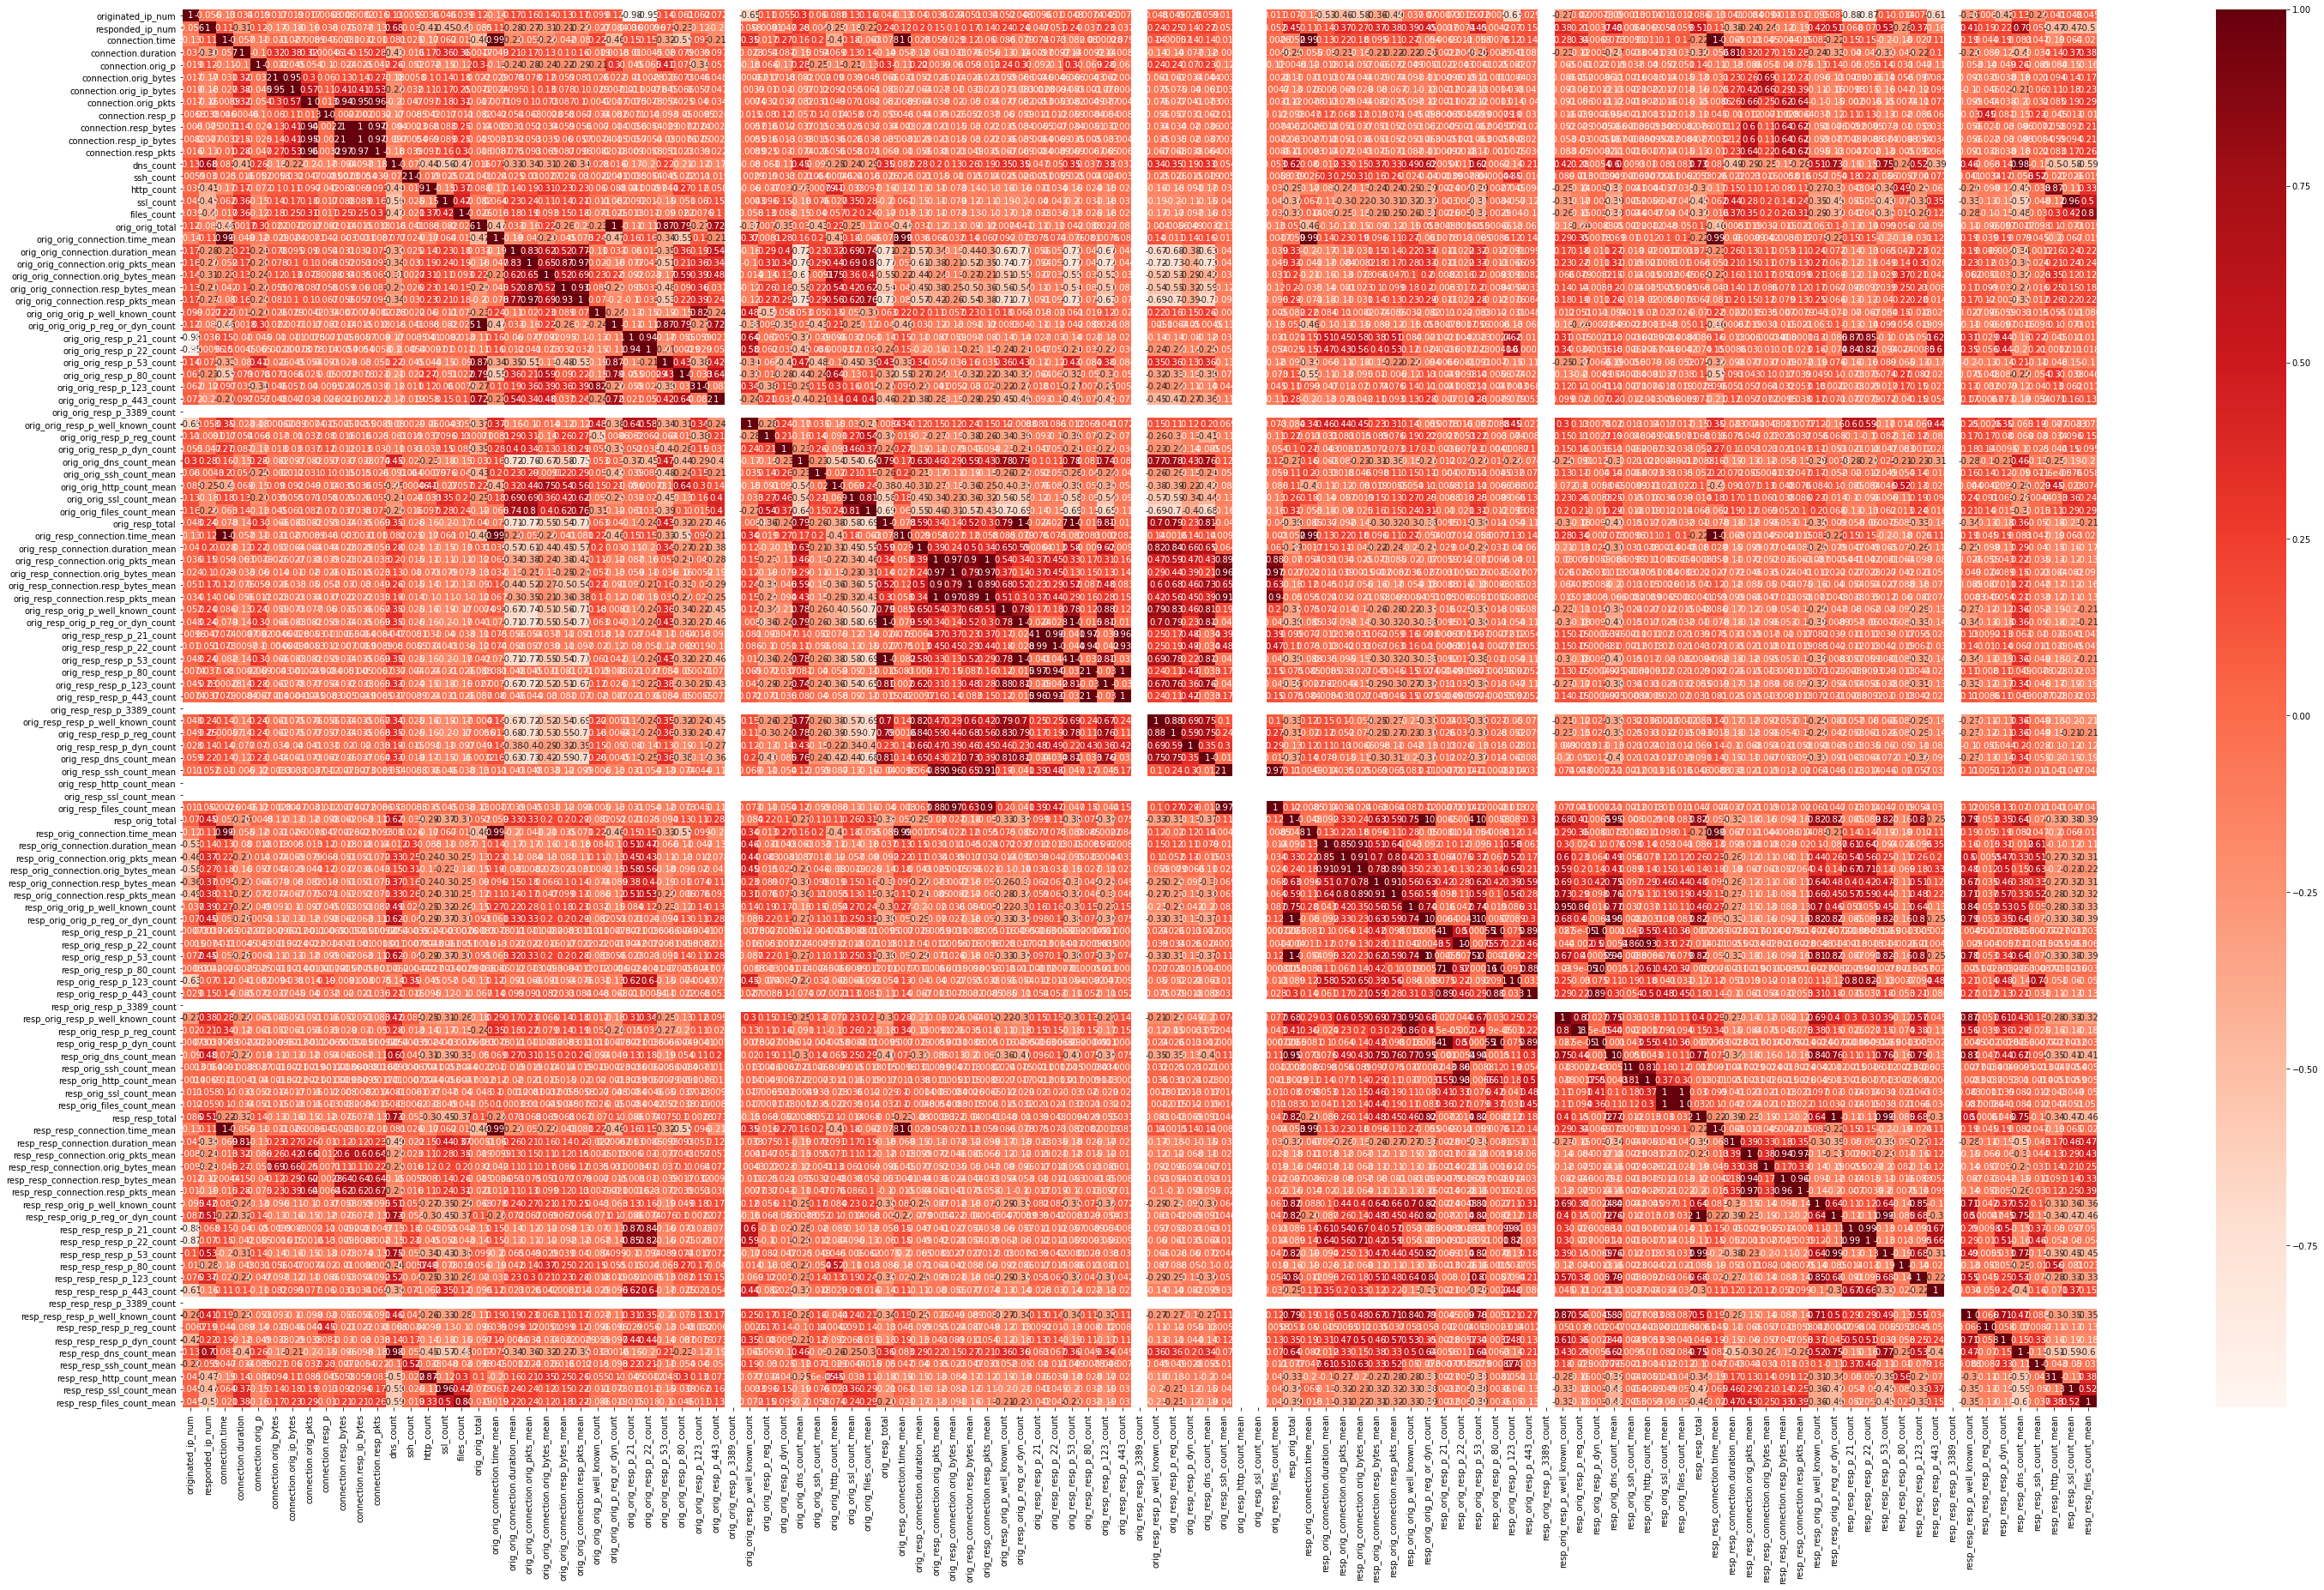

In [47]:
import seaborn as sns

# (https://medium.com/@sadievrenseker/preprocessing-end-to-end-data-preprocessing-1b0672087977)

plt.figure(figsize=(50,30))
cor = result_numerical.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 5. Write the result to file

In [48]:
pd.reset_option('display.max_rows')

In [49]:
result_final = pd.concat([result, data_orig], axis=1)
result_final

originated_ip_num  responded_ip_num  connection.time  \
0                    1.0          0.392825         0.033164   
1                    1.0          0.393944         0.033166   
2                    1.0          0.628232         0.526125   
3                    1.0          0.300514         0.629722   
4                    1.0          0.746861         0.079060   
...                  ...               ...              ...   
20714                0.0          0.746861         0.694452   
20715                0.0          0.746861         0.824779   
20716                0.0          0.746861         0.833190   
20717                0.0          0.746861         0.800218   
20718                1.0          0.746861         0.596836   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             1.714694e-05           0.801529               0.000091   
1             2.613320e-05           0.801773               0.000091   
2             3.556678e-02           0.805573               0.003148   
3             3.260926e-02           0.805726               0.002425   
4             3.020403e-08           0.752773               0.001600   
...                    ...                ...                    ...   
20714         1.398335e-07           0.879477               0.000000   
20715         9.710037e-07           0.681464               0.000000   
20716         1.689189e-07           0.850452               0.000000   
20717         1.331215e-07           0.663488               0.000000   
20718         3.512175e-03           0.000000               0.000207   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000366               0.00096           0.006805   
1                      0.000422               0.00096           0.006805   
2                      0.007739               0.01248           0.006805   
3                      0.005365               0.00832           0.006805   
4                      0.002364               0.00416           0.002072   
...                         ...                   ...                ...   
20714                  0.000103               0.00032           0.006820   
20715                  0.000382               0.00096           0.001191   
20716                  0.000140               0.00032           0.006805   
20717                  0.000140               0.00032           0.006805   
20718                  0.000392               0.00096           0.000000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   0.000000                  0.000005              0.000312   
1                   0.000005                  0.000019              0.000623   
2                   0.012446                  0.012614              0.016828   
3                   0.007504                  0.007630              0.011218   
4                   0.000000                  0.000000              0.000000   
...                      ...                       ...                   ...   
20714               0.000000                  0.000005              0.000312   
20715               0.000000                  0.000008              0.000312   
20716               0.000000                  0.000005              0.000312   
20717               0.000000                  0.000005              0.000312   
20718               0.000000                  0.000000              0.000000   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        0.0     0.000000   
1            0.0        0.0         0.0        0.0     0.000000   
2            0.0        0.0         0.0        1.0     0.000000   
3            0.0        0.0         0.0        1.0     0.102564   
4            1.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
20714        0.0        0.0         0.0   

In [51]:
result_final.to_csv(PREFIX_PATH + 'final.csv', index=False, header=True)